<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/TideMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

In [ ]:
%pip install shap

## Objective

In [ ]:
"""
We want to build a model to learn which matching features are the most successful.
The code should produce a trained model which can be used to order a set of transactions
by likelihood of matching a receipt image.
"""

## Load Dataset

In [4]:
tide_receipt_df = pd.read_csv("/content/data_interview_test.csv", sep=":")

In [5]:
tide_receipt_df.head()

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
0,"10,000",10000,"10,468","10,000",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,"10,000",10000,"10,468","10,001",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,"10,000",10000,"10,468","10,003",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,"10,000",10000,"10,468","10,004",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,"10,000",10000,"10,468","10,005",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
tide_receipt_df.dtypes

receipt_id                  object
company_id                   int64
matched_transaction_id      object
feature_transaction_id      object
DateMappingMatch           float64
AmountMappingMatch         float64
DescriptionMatch           float64
DifferentPredictedTime     float64
TimeMappingMatch           float64
PredictedNameMatch         float64
ShortNameMatch             float64
DifferentPredictedDate     float64
PredictedAmountMatch       float64
PredictedTimeCloseMatch    float64
dtype: object

## Pandas Profiler

In [ ]:

%pip install ydata_profiling

In [9]:
from ydata_profiling import ProfileReport

In [7]:
profile = ProfileReport(tide_receipt_df)

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Library Functions

In [10]:
# import the class
from sklearn.linear_model import LogisticRegression

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn import metrics

class ProbeVariableUsingLR:
  def __init__(self, X_train, X_test, y_train, y_test):

    self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test
    self.logreg = LogisticRegression(random_state=2023)
    self.logreg.fit(self.X_train, self.y_train)
    y_pred = self.logreg.predict(self.X_test)
    self.cnf_matrix = metrics.confusion_matrix(self.y_test, y_pred)

  def get_cnf_matrix(self):
    return self.cnf_matrix

def plot_mosaic(cat1, cat2, cat_name):
  plt.figure(figsize=(10,6))
  cdata = pd.DataFrame({cat_name[0]: cat1, cat_name[1]: cat2})
  mosaic(cdata,cat_name, gap=0.005, title='Plotting Mosaic Plot')
  plt.xlabel(cat_name[0])
  plt.ylabel(cat_name[1])
  plt.show()

def calculate_chi2(cat1, cat2):
  contingency = pd.crosstab(index=cat1, columns=cat2)
  c, p, dof, expected = chi2_contingency(contingency)
  return contingency, c, p

def auc_metric(classifer, X_test_feature_set, y_test):
  y_pred_proba = classifer.predict_proba(X_test_feature_set)[::,1]
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  return auc

def plot_roc_curve(classifer, X_test_feature_set, y_test, name = ""):
  y_pred_proba = classifer.predict_proba(X_test_feature_set)[::,1]
  fpr, tpr, _ = metrics.roc_curve(np.where(y_test == "Yes", 1, 0 ),  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc, 2)))
  plt.legend(loc=4)
  plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"Receiver operating characteristic {name}")
  plt.legend(loc="lower right")
  plt.show()



def match_func(x):
  if x["matched_transaction_id"] == x["feature_transaction_id"]:
    return "Yes"
  else:
    return "No"

def convert_to_category(s):
  return s.astype(int).astype('category')

## Preprocessing

Create a label "match" which will track records were the match was found

In [11]:
tide_receipt_df["match"] = tide_receipt_df[["matched_transaction_id", "feature_transaction_id"]].apply(match_func, axis = 1)

In [12]:
tide_receipt_df["match"].value_counts()

No     11177
Yes      857
Name: match, dtype: int64

In [13]:
tide_receipt_df.columns

Index(['receipt_id', 'company_id', 'matched_transaction_id',
       'feature_transaction_id', 'DateMappingMatch', 'AmountMappingMatch',
       'DescriptionMatch', 'DifferentPredictedTime', 'TimeMappingMatch',
       'PredictedNameMatch', 'ShortNameMatch', 'DifferentPredictedDate',
       'PredictedAmountMatch', 'PredictedTimeCloseMatch', 'match'],
      dtype='object')

In [14]:
## Converted into Category to considering these as binary match.
tide_receipt_df['DifferentPredictedTime_Category'] = tide_receipt_df['DifferentPredictedTime'].astype(int).astype('category')
tide_receipt_df['TimeMappingMatch_Category'] = tide_receipt_df['TimeMappingMatch'].astype(int).astype('category')
tide_receipt_df['ShortNameMatch_Category'] = tide_receipt_df['ShortNameMatch'].astype(int).astype('category')
tide_receipt_df['DifferentPredictedDate_Category'] = tide_receipt_df['DifferentPredictedDate'].astype(int).astype('category')
tide_receipt_df['PredictedTimeCloseMatch_Category'] = tide_receipt_df['PredictedTimeCloseMatch'].astype(int).astype('category')

In [15]:
matching_features_columns = ['DateMappingMatch', 'AmountMappingMatch',
       'DescriptionMatch', 'DifferentPredictedTime_Category', 'TimeMappingMatch_Category',
       'PredictedNameMatch', 'ShortNameMatch_Category', 'DifferentPredictedDate_Category',
       'PredictedAmountMatch', 'PredictedTimeCloseMatch_Category', 'match']

##EDA and Feature Extraction

####Exploring Univariate Predictors
This analysis is understand univariate predictor and their predictive power

#####Train Test Split

<Figure size 1000x600 with 0 Axes>

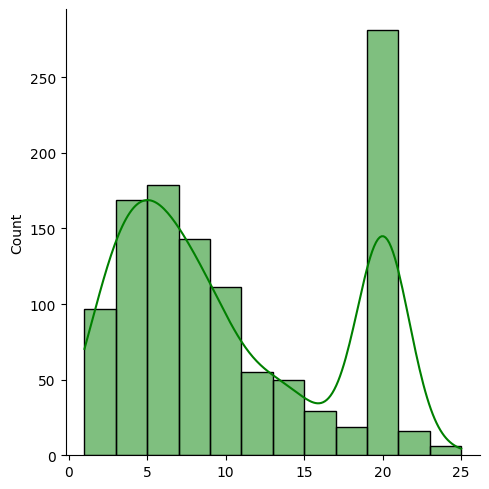

In [37]:
import numpy as np
plt.figure(figsize=(10,6))
sns.displot(tide_receipt_df.receipt_id.value_counts().values, kde=True, color="green")

In [ ]:
"""
Observation:
When plotting receipt_id freq distribution, we see that we see that some receipt_id had a lot many matching records while others have
quite few . So to probe which predictors have an affect on response variable we want to create a train/test split slightly differently.
Instead of randomly splitting, we create 3 stratified bins [ 1., 13., 25.] and then split data into train/test (90:10 ratio) picking from three bins.
This will give a better evaluation strategy for probing potential predictors power.
The below code instead of randomly splitting records between train and test set, that randomly picks receipt_id from the above distribution
and puts all records pertaining to a receipt_id in either training set or test set.
"""

In [57]:
receipt_id_dist = pd.DataFrame(tide_receipt_df.receipt_id.value_counts()).reset_index().rename(columns = {"index": "X", "receipt_id": "y"})

In [58]:
min_cnt = np.amin(receipt_id_dist["y"])
max_cnt = np.amax(receipt_id_dist["y"])
bins     = np.linspace(start=min_cnt, stop=max_cnt, num=3)
y_binned = np.digitize(receipt_id_dist["y"], bins, right=True)

In [24]:
bins

array([ 1., 13., 25.])

In [25]:
y_binned

array([2, 2, 2, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split
X_train_receipt_id, X_test_receipt_id, y_train, y_test = train_test_split(
    receipt_id_dist["X"],
    receipt_id_dist["y"],
    stratify=y_binned,
    random_state=2023,
    test_size=0.1
)

In [60]:
X_train = tide_receipt_df[tide_receipt_df["receipt_id"].isin(X_train_receipt_id)]
X_test = tide_receipt_df[tide_receipt_df["receipt_id"].isin(X_test_receipt_id)]
y_train = tide_receipt_df[tide_receipt_df["receipt_id"].isin(X_train_receipt_id)][["match"]]
y_test = tide_receipt_df[tide_receipt_df["receipt_id"].isin(X_test_receipt_id)][["match"]]

#####DateMappingMatch - Important Predictor

In [ ]:
"""
Box plot suggests that there is a distinct difference DateMappingMatch DateMappingMatch values.
Makes it an important parameter to consider
"""

<Axes: xlabel='DateMappingMatch', ylabel='match'>

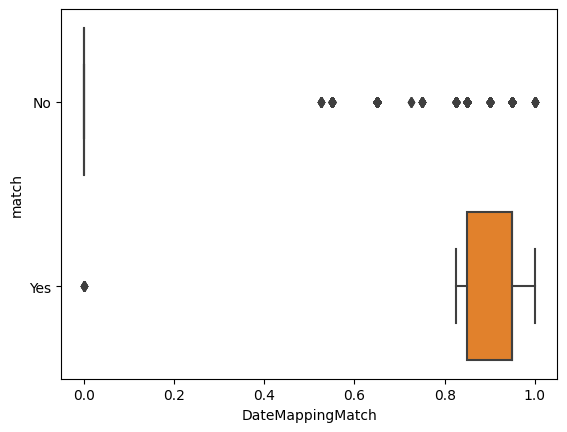

In [72]:
#plt.figure(figsize=(10,6))
sns.boxplot(data = tide_receipt_df, x="DateMappingMatch", y="match")

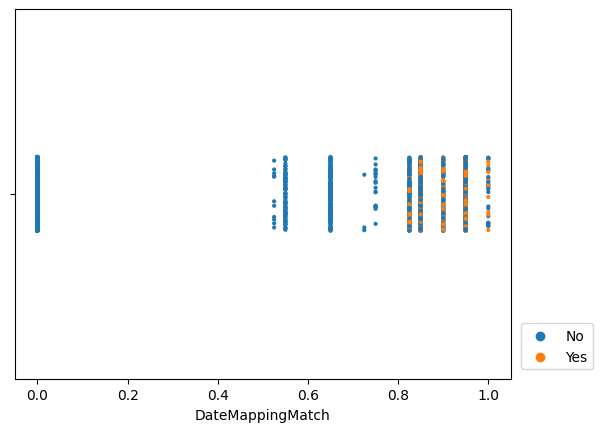

In [124]:
sns.stripplot( x = tide_receipt_df["DateMappingMatch"], hue=tide_receipt_df["match"], dodge=False, size=3 )
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

In [269]:
p = ProbeVariableUsingLR(X_train[["DateMappingMatch"]], X_test[["DateMappingMatch"]], y_train, y_test )
p.get_cnf_matrix()

array([[1141,    0],
       [  86,    0]])

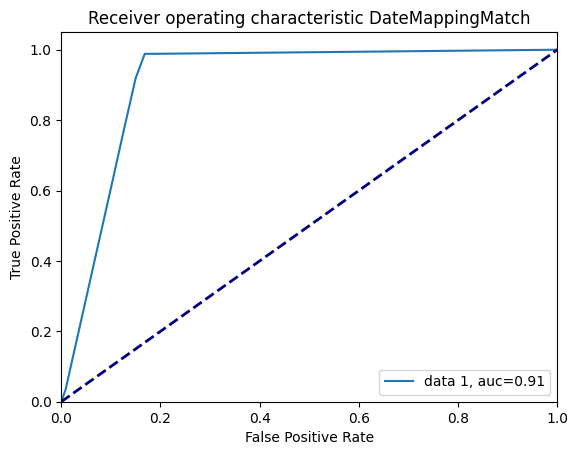

In [270]:
plot_roc_curve(p.logreg, X_test[["DateMappingMatch"]], y_test, "DateMappingMatch")

#####AmountMappingMatch - Unimportant Predictor

In [ ]:
"""
Box plot cannot find any distinction between matched / unmatched case.
This predictor does not have linear separation, unless higher order transformation is applied this isnt a powerful predictor.
Further, ROC curve shows the logisitic regression model performance is equivalent to a random dummy classifer.
"""

<Axes: xlabel='AmountMappingMatch', ylabel='match'>

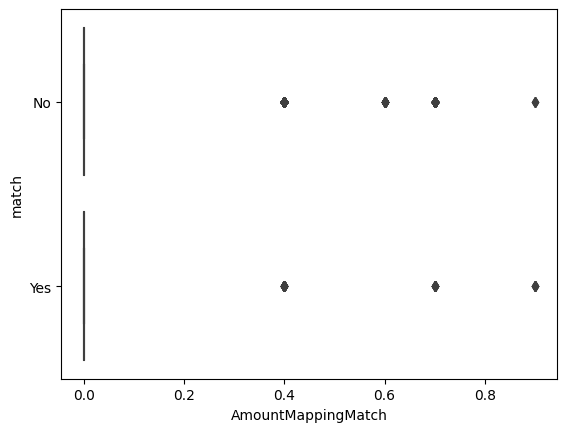

In [96]:
#plt.figure(figsize=(10,6))
sns.boxplot(data = tide_receipt_df, x="AmountMappingMatch", y="match")

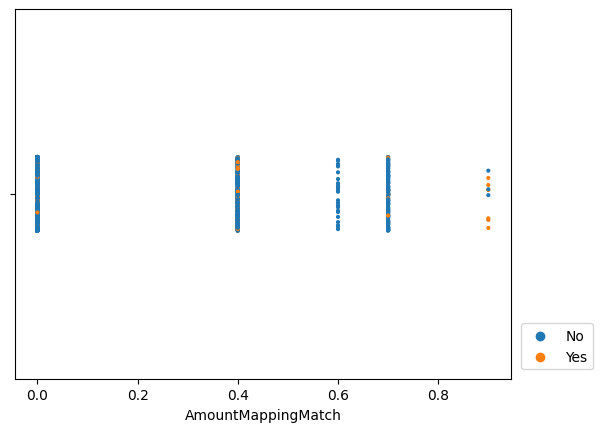

In [125]:
sns.stripplot( x = tide_receipt_df["AmountMappingMatch"], hue=tide_receipt_df["match"], dodge=False, size=3 )
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

In [271]:
p = ProbeVariableUsingLR( X_train[["AmountMappingMatch"]], X_test[["AmountMappingMatch"]], y_train, y_test )
p.get_cnf_matrix()

array([[1141,    0],
       [  86,    0]])

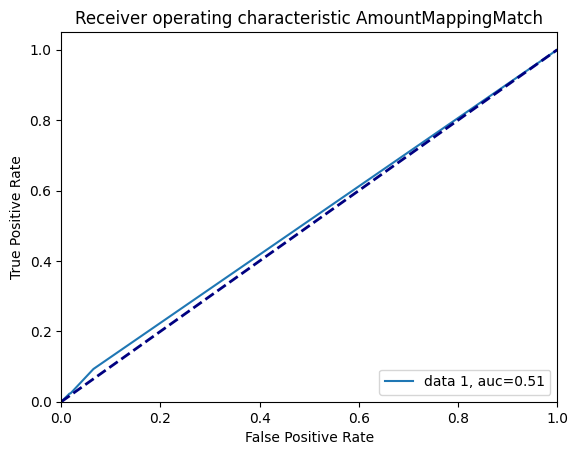

In [272]:
plot_roc_curve(p.logreg, X_test[["AmountMappingMatch"]], y_test, "AmountMappingMatch")

#####DescriptionMatch


In [ ]:
"""
Box plot does not show any distinction between matched vs unmatched results
This predictor does not clean linear separation, however, ROC curve shows it has some predictive power.
"""

<Axes: xlabel='DescriptionMatch', ylabel='match'>

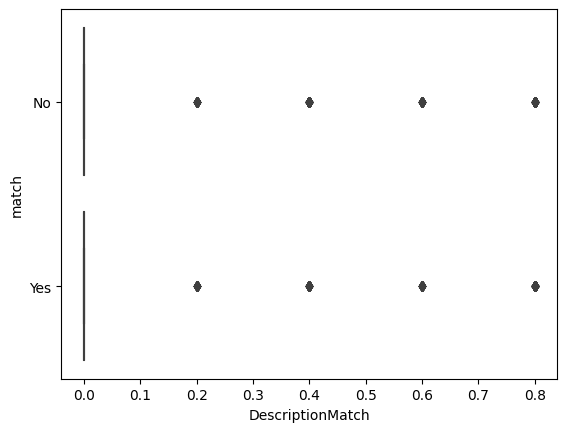

In [115]:

#plt.figure(figsize=(10,6))
sns.boxplot(data = tide_receipt_df, x="DescriptionMatch", y="match")

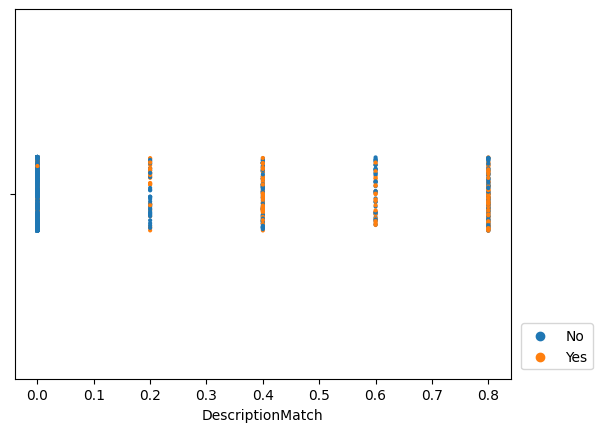

In [126]:
sns.stripplot( x = tide_receipt_df["DescriptionMatch"], hue=tide_receipt_df["match"], dodge=False, size=3 )
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

In [273]:
p = ProbeVariableUsingLR(X_train[["DescriptionMatch"]], X_test[["DescriptionMatch"]], y_train, y_test)
p.get_cnf_matrix()

array([[1126,   15],
       [  70,   16]])

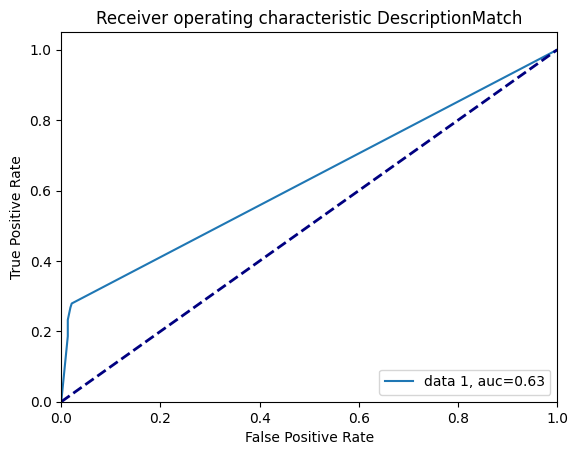

In [274]:
plot_roc_curve(p.logreg, X_test[["DescriptionMatch"]], y_test, "DescriptionMatch")

#####DifferentPredictedTime_Category - Important Predictor

In [ ]:
"""
This predictor seems can be used as a feature. The chisqu value is high and p-value is close to 0, which means this feature is
statistically significant should be considered.
"""

<Figure size 1000x600 with 0 Axes>

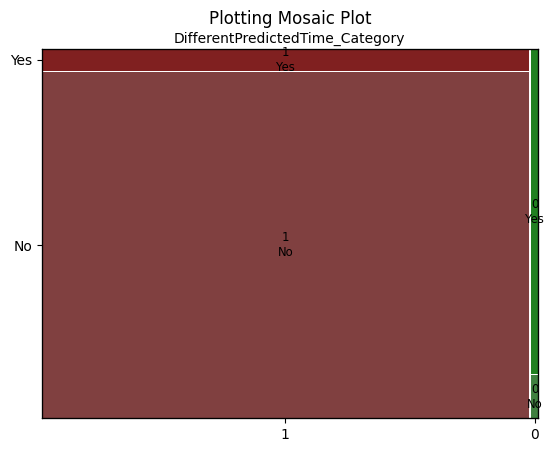

In [146]:
plot_mosaic(tide_receipt_df['DifferentPredictedTime_Category'], tide_receipt_df['match'], ['DifferentPredictedTime_Category', 'match'])

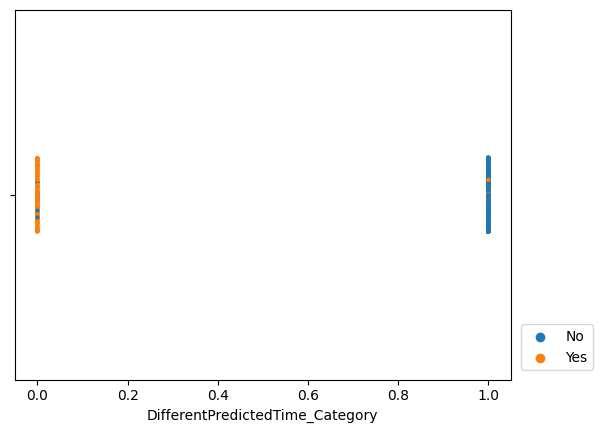

In [127]:
sns.stripplot( x = tide_receipt_df["DifferentPredictedTime_Category"], hue=tide_receipt_df["match"], dodge=False, size=3 )
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

In [150]:
contingency , c, p = calculate_chi2(tide_receipt_df['DifferentPredictedTime_Category'], tide_receipt_df['match'])

In [151]:
contingency

match,No,Yes
DifferentPredictedTime_Category,,
0,19,144
1,11158,713


In [152]:
print(f"chi2 value = {c}, P-value = {p}")

chi2 value = 1635.6326361830393, P-value = 0.0


#####TimeMappingMatch_Category - Important Predictor

In [ ]:
"""
This feature has a high chisqu value, it is statisically significant.
However, these two variables "Different Predicted Time" , "TimeMappingMatch" are highly correlated seen from Pandas
Profiler We need to decide on one variable."

<Figure size 1000x600 with 0 Axes>

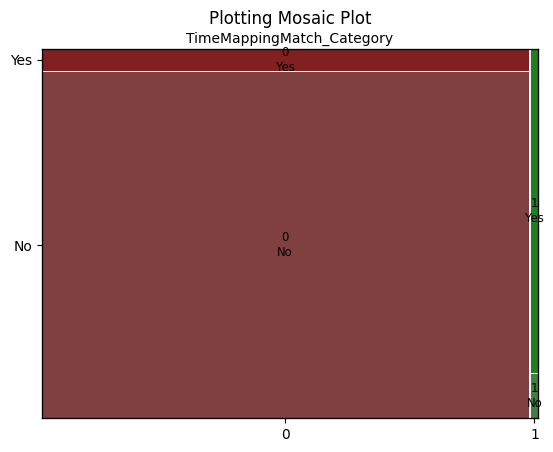

In [157]:
plot_mosaic(tide_receipt_df['TimeMappingMatch_Category'], tide_receipt_df['match'], ['TimeMappingMatch_Category', 'match'])

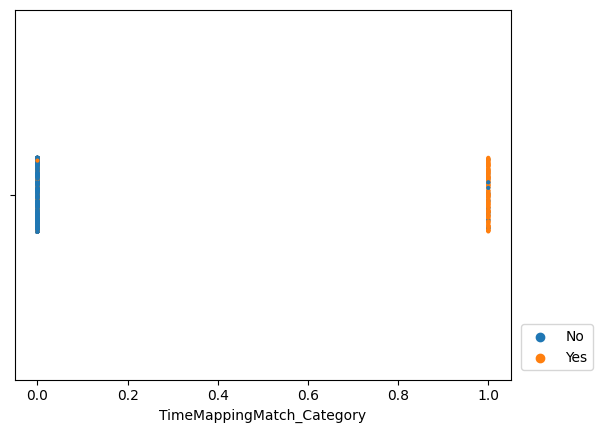

In [128]:
sns.stripplot( x = tide_receipt_df["TimeMappingMatch_Category"], hue=tide_receipt_df["match"], dodge=False, size=3 )
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

In [154]:
contingency , c, p = calculate_chi2(tide_receipt_df['TimeMappingMatch_Category'], tide_receipt_df['match'])

In [155]:
contingency

match,No,Yes
TimeMappingMatch_Category,,
0,11157,710
1,20,147


In [156]:
print(f"chi2 value = {c}, P-value = {p}")

chi2 value = 1663.4224395342248, P-value = 0.0


#####PredictedNameMatch

In [ ]:
"""
This predictor does not have linear separation, unless higher order transformation is applied.
ROC curve shows this predictor has some prediction power, however not much.
"""

<Axes: xlabel='PredictedNameMatch', ylabel='match'>

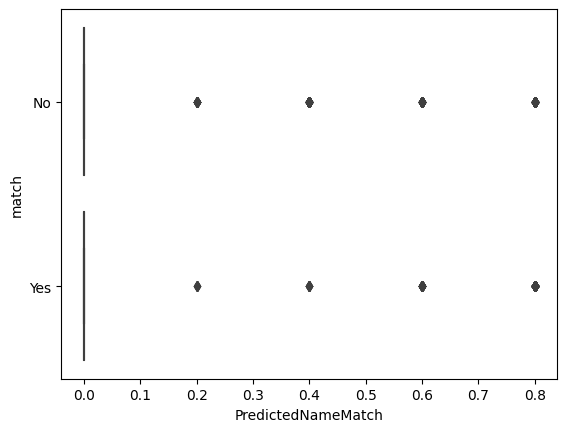

In [158]:
sns.boxplot(data = tide_receipt_df, x="PredictedNameMatch", y="match")

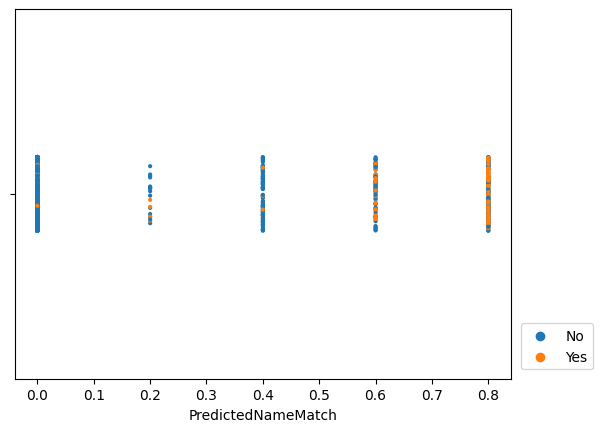

In [129]:
sns.stripplot( x = tide_receipt_df["PredictedNameMatch"], hue=tide_receipt_df["match"], dodge=False, size=3 )
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

In [275]:
p = ProbeVariableUsingLR(X_train[["PredictedNameMatch"]], X_test[["PredictedNameMatch"]], y_train, y_test)
p.get_cnf_matrix()

array([[1123,   18],
       [  66,   20]])

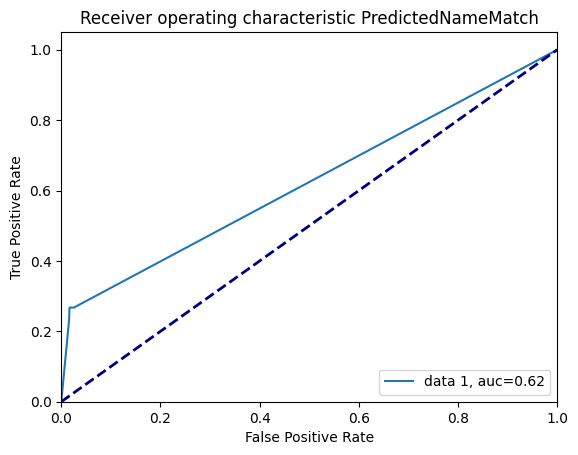

In [276]:
plot_roc_curve(p.logreg, X_test[["PredictedNameMatch"]], y_test, "PredictedNameMatch")

#####ShortNameMatch_Category

In [ ]:
"""
This is a statistically significant feature.
"""

<Figure size 1000x600 with 0 Axes>

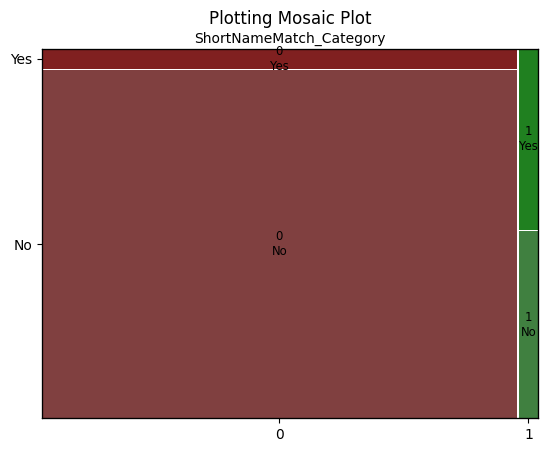

In [171]:
plot_mosaic(tide_receipt_df['ShortNameMatch_Category'], tide_receipt_df['match'], ['ShortNameMatch_Category', 'match'])

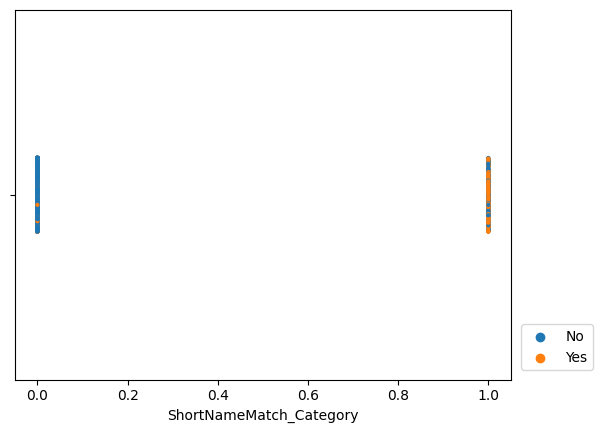

In [130]:
sns.stripplot( x = tide_receipt_df["ShortNameMatch_Category"], hue=tide_receipt_df["match"], dodge=False, size=3 )
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

In [175]:
contingency , c, p = calculate_chi2(tide_receipt_df['ShortNameMatch_Category'], tide_receipt_df['match'])

In [176]:
contingency

match,No,Yes
ShortNameMatch_Category,,
0,10945,633
1,232,224


In [177]:
print(f"chi2 value = {c}, P-value = {p}")

chi2 value = 1257.5074545145803, P-value = 1.938946722903972e-275


#####DifferentPredictedDate_Category

In [ ]:
"""
This is a statistically significant feature.
"""

<Figure size 1000x600 with 0 Axes>

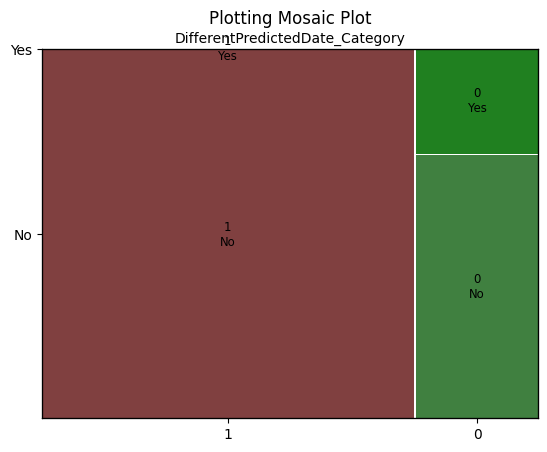

In [178]:
plot_mosaic(tide_receipt_df['DifferentPredictedDate_Category'], tide_receipt_df['match'], ['DifferentPredictedDate_Category', 'match'])

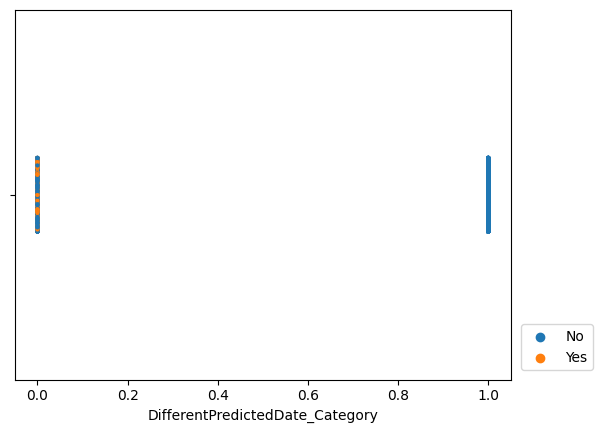

In [131]:
sns.stripplot( x = tide_receipt_df["DifferentPredictedDate_Category"], hue=tide_receipt_df["match"], dodge=False, size=3 )
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

In [179]:
contingency , c, p = calculate_chi2(tide_receipt_df['DifferentPredictedDate_Category'], tide_receipt_df['match'])
contingency

match,No,Yes
DifferentPredictedDate_Category,,
0,2121,845
1,9056,12


In [180]:
print(f"chi2 value = {c}, P-value = {p}")

chi2 value = 2712.865216752112, P-value = 0.0


#####PredictedAmountMatch - Unimportant Predictor


In [ ]:
"""
This predictor does not have linear separation, unless higher order transformation is applied.
ROC curve shows that this predictor has a power same as random dummy predictor. This predictor will not
be considered.
"""

<Axes: xlabel='PredictedAmountMatch', ylabel='match'>

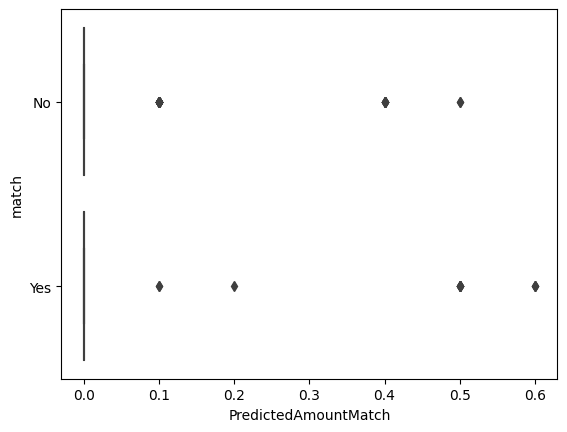

In [181]:
sns.boxplot(data = tide_receipt_df, x="PredictedAmountMatch", y="match")

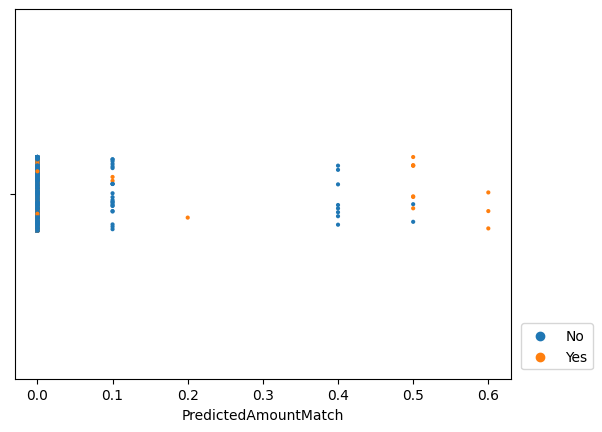

In [132]:
sns.stripplot( x = tide_receipt_df["PredictedAmountMatch"], hue=tide_receipt_df["match"], dodge=False, size=3 )
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

In [277]:
p = ProbeVariableUsingLR(X_train[["PredictedAmountMatch"]], X_test[["PredictedAmountMatch"]], y_train, y_test)
p.get_cnf_matrix()

array([[1141,    0],
       [  86,    0]])

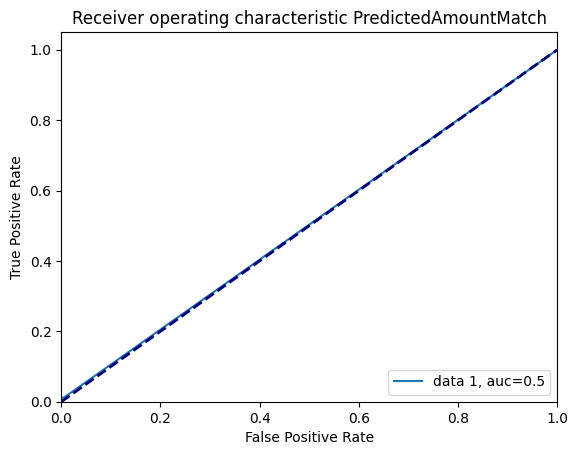

In [278]:
plot_roc_curve(p.logreg, X_test[["PredictedAmountMatch"]], y_test, "PredictedAmountMatch")

#####PredictedTimeCloseMatch_Category

<Figure size 1000x600 with 0 Axes>

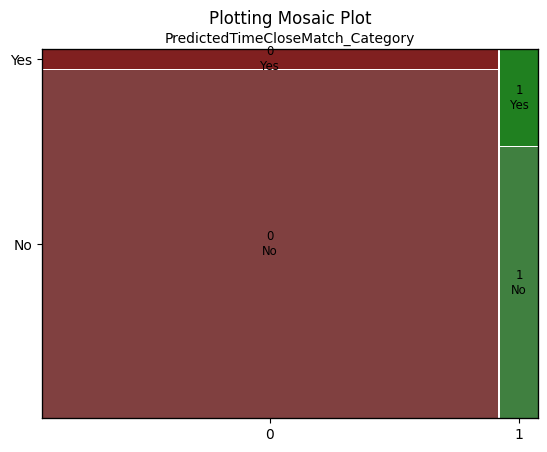

In [187]:
plot_mosaic(tide_receipt_df['PredictedTimeCloseMatch_Category'], tide_receipt_df['match'], ['PredictedTimeCloseMatch_Category', 'match'])

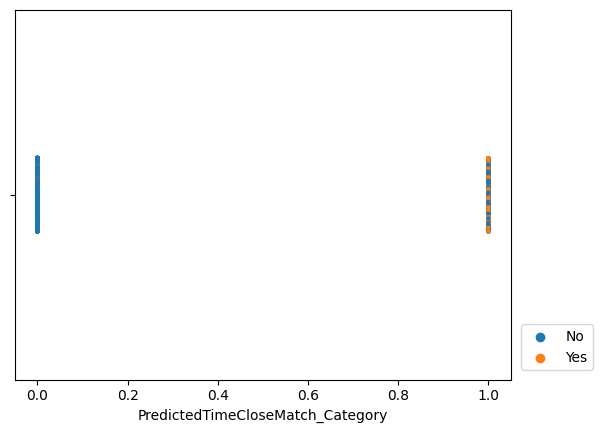

In [133]:
sns.stripplot( x = tide_receipt_df["PredictedTimeCloseMatch_Category"], hue=tide_receipt_df["match"], dodge=False, size=3 )
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

In [188]:
contingency , c, p = calculate_chi2(tide_receipt_df['PredictedTimeCloseMatch_Category'], tide_receipt_df['match'])
contingency

match,No,Yes
PredictedTimeCloseMatch_Category,,
0,10500,613
1,677,244


In [189]:
print(f"chi2 value = {c}, P-value = {p}")

chi2 value = 562.6509051134311, P-value = 2.228232037248374e-124


####Feature Importance

In [ ]:
"""
Obsevation:
#Using an ensemble method like Random Forest gives us an alternate view of feature importance, it also helps us understand the
#possible interactions among predictors that can help us build even more powerful model.

#Here we will just pretuned Random Forest to assess the feature importance of the features.
"""

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [55]:
tmp_tide_receipt_df = tide_receipt_df.copy()

In [62]:
rf = RandomForestClassifier()
rf.fit(X_train[matching_features_columns[:-1]], y_train)

RandomForestClassifier()

In [84]:
#### Define Metrics
accuracy = lambda x: round((x[0][0] + x[1][1]) / np.sum(x), 2)

In [69]:
y_train_pred = rf.predict(X_train[matching_features_columns[:-1]])
y_test_pred = rf.predict(X_test[matching_features_columns[:-1]])

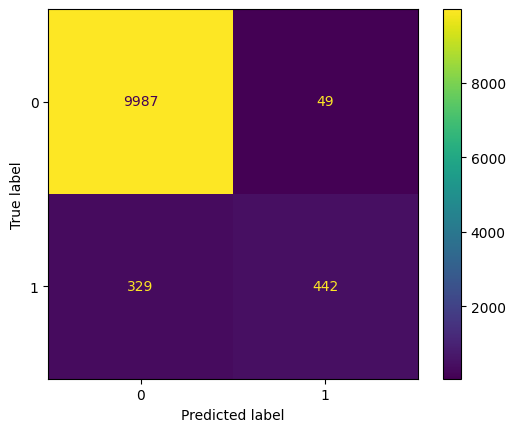

In [76]:
# Create the confusion matrix on train
cm_train = confusion_matrix(y_train, y_train_pred)

ConfusionMatrixDisplay(confusion_matrix=cm_train).plot()

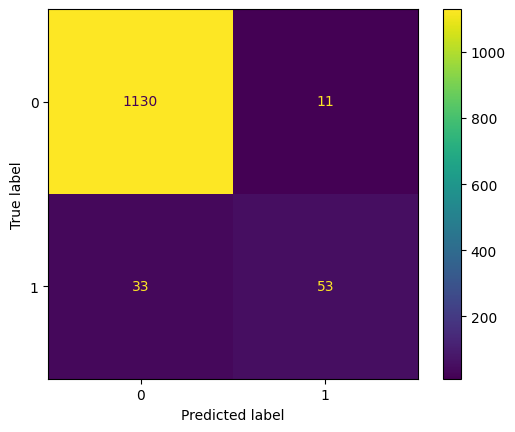

In [86]:
# Create the confusion matrix on test
cm_test = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

In [87]:
print(f"Train Accuracy = {accuracy(cm_train)}")
print(f"Test Accuracy = {accuracy(cm_test)}")

Train Accuracy = 0.97
Test Accuracy = 0.96


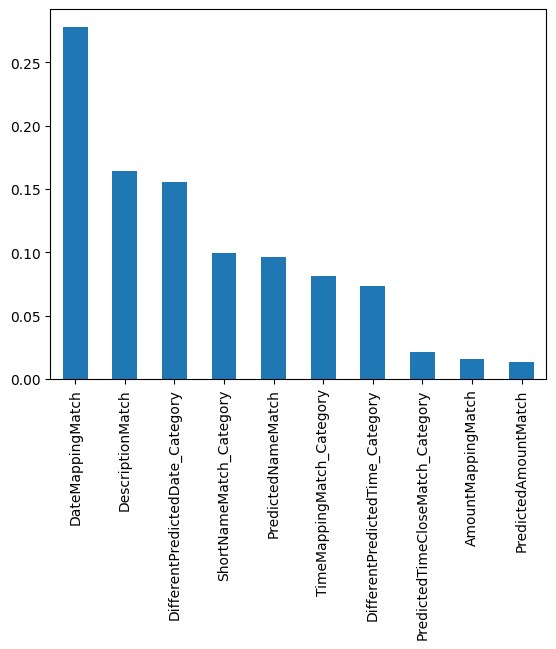

In [89]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train[matching_features_columns[:-1]].columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [90]:
feature_importances

DateMappingMatch                    0.278085
DescriptionMatch                    0.164238
DifferentPredictedDate_Category     0.155172
ShortNameMatch_Category             0.099826
PredictedNameMatch                  0.096644
TimeMappingMatch_Category           0.081406
DifferentPredictedTime_Category     0.073752
PredictedTimeCloseMatch_Category    0.021058
AmountMappingMatch                  0.016114
PredictedAmountMatch                0.013705
dtype: float64

In [ ]:
"""
Obsevation:
DateMappingMatch is the most promising predictor.

AmountMappingMatch, PredictedAmountMatch were considered least important predictors.

PredictedTimeCloseMatch_Category, PredictedTimeCloseMatch_Category variables have also less important.

Further, TimeMappingMatch_Category is correlated to DifferentPredictedTime_Category from Pandas Profiler Output,

so DifferentPredictedTime_Category will dropped because it has less importance compared to TimeMappingMatch_Category.
"""

####Interaction Analysis

In [ ]:
"""
Motivation:
To understand if feature interactions can play a role in model prediction.

There are 3 different plots here
First visualizing interactions between DateMappingMatch, DescriptionMatch (continous variables) and categorical variables
Second interactions among categorical variables (DifferentPredictedDate_Category, TimeMappingMatch_Category, ShortNameMatch_Category, PredictedTimeCloseMatch_Category)
Third continious variable interactions ("DateMappingMatch", "DescriptionMatch", "PredictedNameMatch")

Assumption: We only considered interactions scenario where we could see some visual linear separation.
1. Interaction between DateMappingMatch and DifferentPredictedDate_Category can be explored, rest do not have linear separation.
2 Interactions (DifferentPredictedDate_Category, TimeMappingMatch_Category, ShortNameMatch_Category) will be explored PredictedTimeCloseMatch_Category will be
dropped because using emsemble method we found that it has low feature importance. Furthermore, ('TimeMappingMatch_Category', 'ShortNameMatch_Category')
interaction is also dropped to avoid cyclic dependency.
3. Interactions among continuous variables do not show linear separations and hence will be ignored.
"""

<Axes: xlabel='DescriptionMatch', ylabel='DifferentPredictedDate_Category'>

<Figure size 1400x800 with 0 Axes>

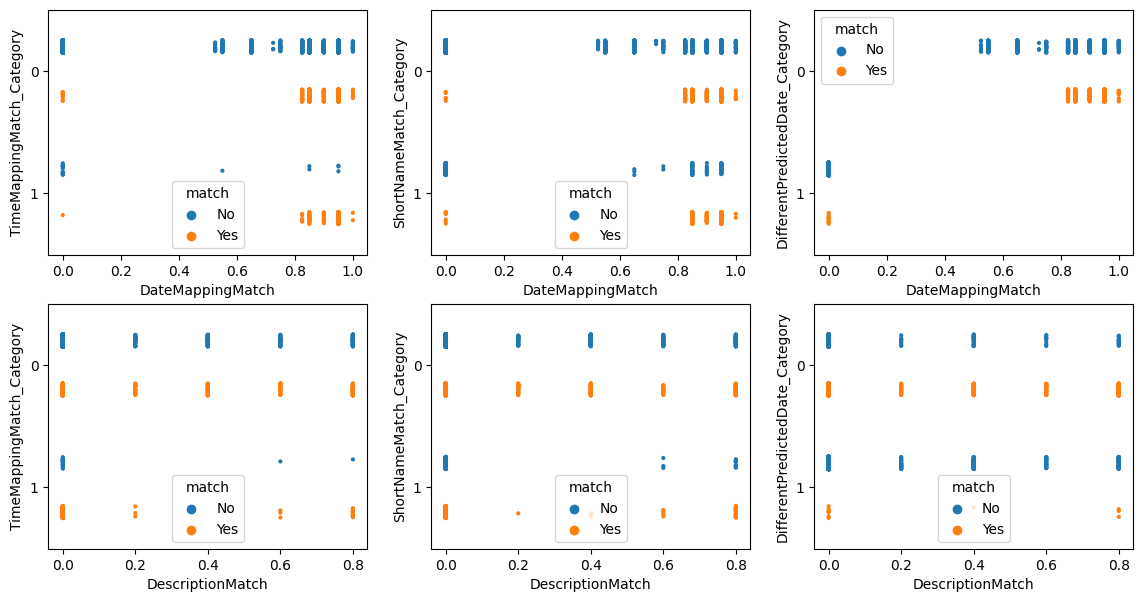

In [159]:
plt.figure(figsize=(14,8))

fig, axs = plt.subplots(ncols=3, nrows = 2, figsize=(14,7))
sns.stripplot( x = tide_receipt_df["DateMappingMatch"] ,
              y = tide_receipt_df["TimeMappingMatch_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[0][0] )
sns.stripplot( x = tide_receipt_df["DateMappingMatch"] ,
              y = tide_receipt_df["ShortNameMatch_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[0][1] )
sns.stripplot( x = tide_receipt_df["DateMappingMatch"] ,
              y = tide_receipt_df["DifferentPredictedDate_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[0][2] )

sns.stripplot( x = tide_receipt_df["DescriptionMatch"] ,
              y = tide_receipt_df["TimeMappingMatch_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[1][0] )
sns.stripplot( x = tide_receipt_df["DescriptionMatch"] ,
              y = tide_receipt_df["ShortNameMatch_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[1][1] )
sns.stripplot( x = tide_receipt_df["DescriptionMatch"] ,
              y = tide_receipt_df["DifferentPredictedDate_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[1][2] )


<Axes: xlabel='TimeMappingMatch_Category', ylabel='PredictedTimeCloseMatch_Category'>

<Figure size 1400x800 with 0 Axes>

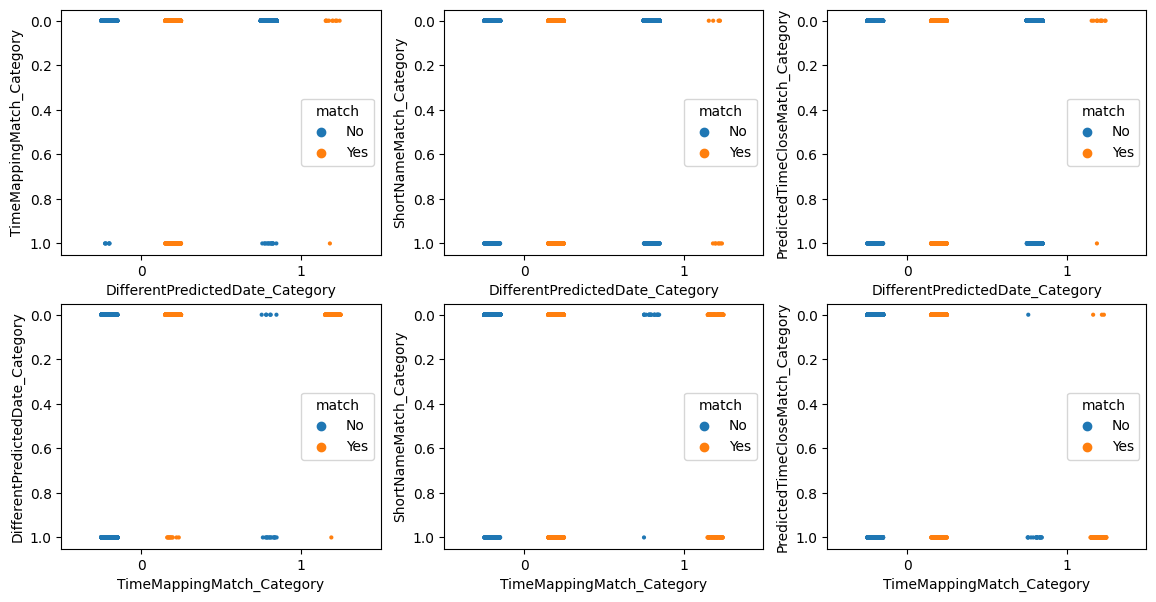

In [157]:
plt.figure(figsize=(14,8))

fig, axs = plt.subplots(ncols=3, nrows = 2, figsize=(14,7))
sns.stripplot( x = tide_receipt_df["DifferentPredictedDate_Category"] ,
              y = tide_receipt_df["TimeMappingMatch_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[0][0] )
sns.stripplot( x = tide_receipt_df["DifferentPredictedDate_Category"] ,
              y = tide_receipt_df["ShortNameMatch_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[0][1] )
sns.stripplot( x = tide_receipt_df["DifferentPredictedDate_Category"] ,
              y = tide_receipt_df["PredictedTimeCloseMatch_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[0][2] )

sns.stripplot( x = tide_receipt_df["TimeMappingMatch_Category"] ,
              y = tide_receipt_df["DifferentPredictedDate_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[1][0] )
sns.stripplot( x = tide_receipt_df["TimeMappingMatch_Category"] ,
              y = tide_receipt_df["ShortNameMatch_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[1][1] )
sns.stripplot( x = tide_receipt_df["TimeMappingMatch_Category"] ,
              y = tide_receipt_df["PredictedTimeCloseMatch_Category"],
               hue=tide_receipt_df["match"], dodge=True, size=3, ax=axs[1][2] )


<Figure size 1400x700 with 0 Axes>

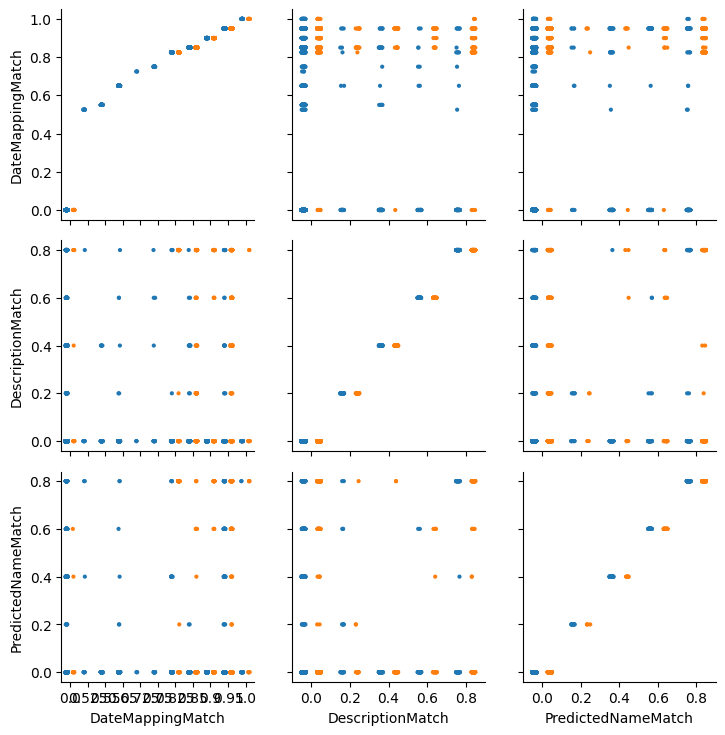

In [165]:
plt.figure(figsize=(14,7))
g = sns.PairGrid(tide_receipt_df[["DateMappingMatch", "DescriptionMatch", "PredictedNameMatch", "match"]], hue="match")
g.map(sns.stripplot, dodge=True, size=3)

##Feature Set
Based on our analysis and finding we select following as our feature *set*

In [66]:
feature_set_consider = [
    'DateMappingMatch', 'DescriptionMatch',
    'DifferentPredictedDate_Category', 'ShortNameMatch_Category',
    'PredictedNameMatch', 'TimeMappingMatch_Category'
]

In [67]:
interaction_terms = [
    ('DateMappingMatch', 'DifferentPredictedDate_Category'),
    ('DifferentPredictedDate_Category', 'TimeMappingMatch_Category'),
    ('DifferentPredictedDate_Category', 'ShortNameMatch_Category')
]

In [ ]:
"""
Observation:
For our model we plan to use
Number of univariate variables : 6,
Number of interactions: 3
Total Number of Variables : 9
"""

##Initial Model Build and Experimentation

#####Training/Test set


In [68]:
expanded_tide_receipt_df = pd.get_dummies(tide_receipt_df[feature_set_consider],drop_first=True)
expanded_tide_receipt_df.head()

,DateMappingMatch,DescriptionMatch,PredictedNameMatch,DifferentPredictedDate_Category_1,ShortNameMatch_Category_1,TimeMappingMatch_Category_1
0,0.0,0.0,0.0,1,0,0
1,0.0,0.0,0.0,1,0,0
2,0.0,0.0,0.0,1,0,0
3,0.0,0.0,0.0,1,0,0
4,0.0,0.0,0.0,1,0,0


In [69]:
expanded_tide_receipt_df["DateMappingMatch_DifferentPredictedDate_Category"] = expanded_tide_receipt_df["DateMappingMatch"] * expanded_tide_receipt_df["DifferentPredictedDate_Category_1"]
expanded_tide_receipt_df["DifferentPredictedDate_Category_TimeMappingMatch_Category"] = expanded_tide_receipt_df["DifferentPredictedDate_Category_1"] * expanded_tide_receipt_df["TimeMappingMatch_Category_1"]
expanded_tide_receipt_df["DifferentPredictedDate_Category_ShortNameMatch_Category"] = expanded_tide_receipt_df["DifferentPredictedDate_Category_1"] * expanded_tide_receipt_df["ShortNameMatch_Category_1"]

In [70]:
## For initial model we will use train / test split we before
X_train_feature_set = expanded_tide_receipt_df.loc[X_train.index]
X_test_feature_set = expanded_tide_receipt_df.loc[X_test.index]

In [62]:
X_train_feature_set.shape, X_test_feature_set.shape ,y_train.shape, y_test.shape

((10807, 9), (1227, 9), (10807, 1), (1227, 1))

#####LogisticRegression Model

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import metrics

In [116]:
import shap
np.random.seed(101)
shap.initjs()

In [73]:
pipe_logreg = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', LogisticRegression(random_state=2023))
])
pipe_logreg.fit(X_train_feature_set, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('classifier', LogisticRegression(random_state=2023))])

In [107]:
print('Training set score: ' + str(pipe_logreg.score(X_train_feature_set,y_train)))
print('Test set score: ' + str(pipe_logreg.score(X_test_feature_set,y_test)))

Training set score: 0.9561395391875637
Test set score: 0.9633251833740831


In [111]:
y_pred = pipe_logreg.predict(X_test_feature_set)

In [112]:
cnf_matrix_test = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_test

array([[1132,    9],
       [  36,   50]])

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.97      0.99      0.98      1141
         Yes       0.85      0.58      0.69        86

    accuracy                           0.96      1227
   macro avg       0.91      0.79      0.84      1227
weighted avg       0.96      0.96      0.96      1227



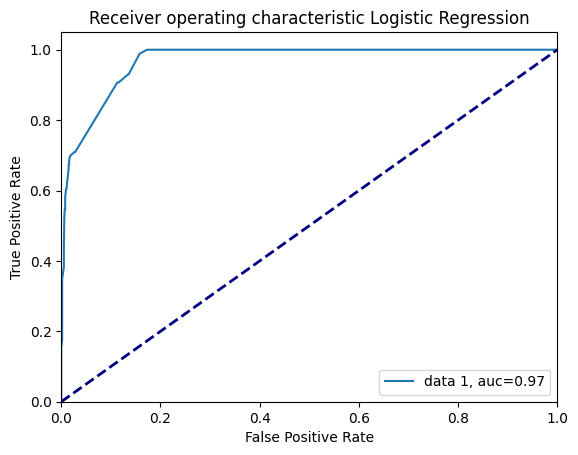

In [114]:
plot_roc_curve(pipe_logreg,X_test_feature_set, y_test, "Logistic Regression")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


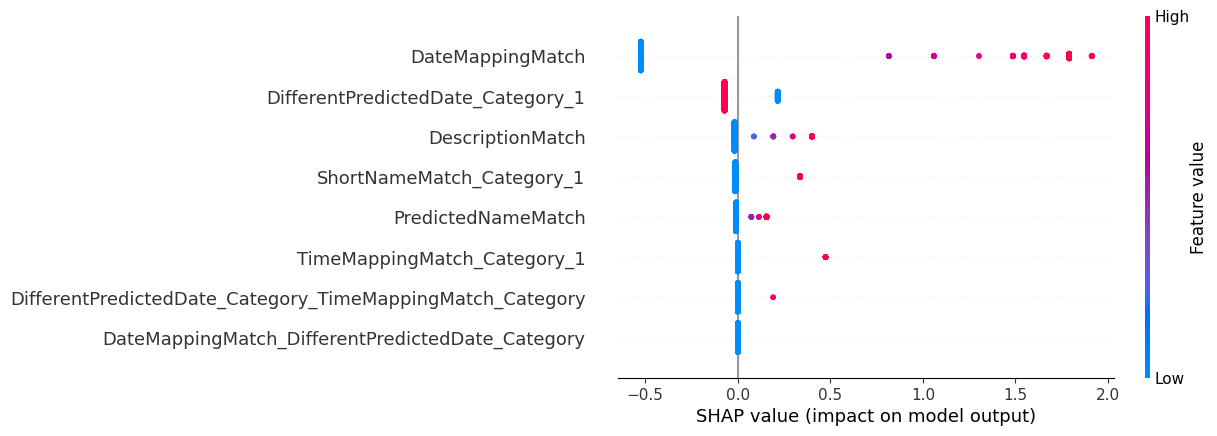

In [137]:
explainer = shap.Explainer(pipe_logreg[2], X_train_feature_set.drop(columns='DifferentPredictedDate_Category_ShortNameMatch_Category'))
shap_values = explainer(X_test_feature_set.drop(columns='DifferentPredictedDate_Category_ShortNameMatch_Category'))
shap.plots.beeswarm(shap_values)

####RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [76]:
pipe_rf = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', RandomForestClassifier())
])
pipe_rf.fit(X_train_feature_set, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('classifier', RandomForestClassifier())])

In [87]:
print('Training set score: ' + str(pipe_rf.score(X_train_feature_set,y_train)))
print('Test set score: ' + str(pipe_rf.score(X_test_feature_set,y_test)))

Training set score: 0.9628018876654021
Test set score: 0.9633251833740831


In [88]:
y_pred = pipe_rf.predict(X_test_feature_set)

In [89]:
cnf_matrix_test = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_test

array([[1127,   14],
       [  31,   55]])

In [91]:
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.97      0.99      0.98      1141
         Yes       0.80      0.64      0.71        86

    accuracy                           0.96      1227
   macro avg       0.89      0.81      0.85      1227
weighted avg       0.96      0.96      0.96      1227



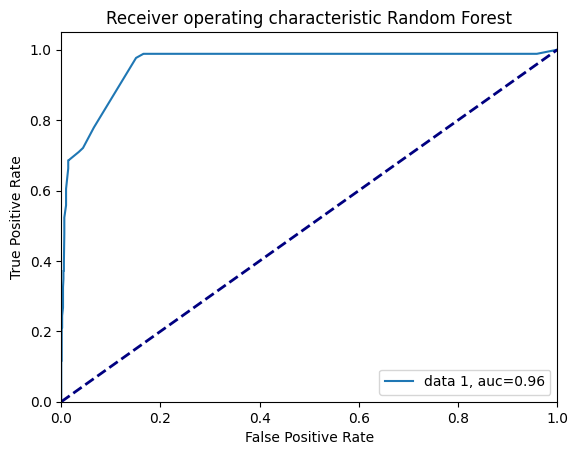

In [93]:
plot_roc_curve(pipe_rf,X_test_feature_set, y_test, "Random Forest")

<Axes: >

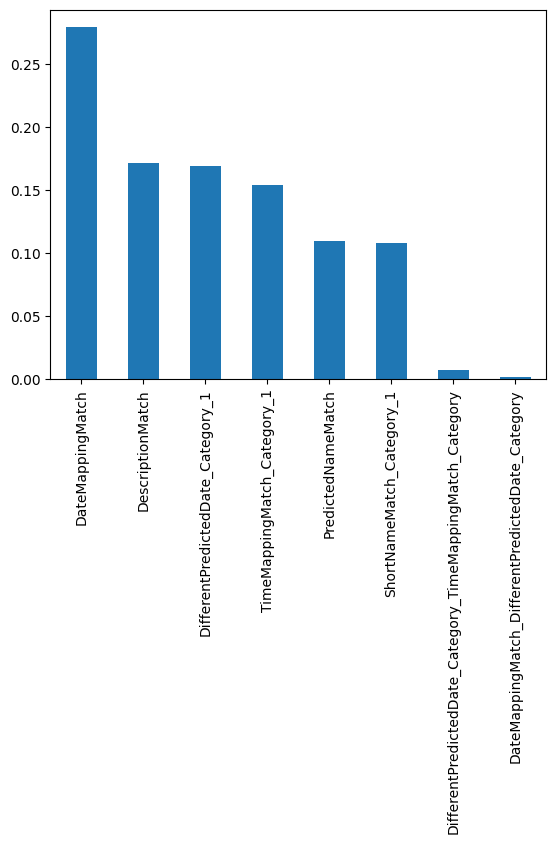

In [103]:
feature_importances = pd.Series(pipe_rf[2].feature_importances_, index=X_train_feature_set.columns[:-1]).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [286]:
feature_importances.index

Index(['DateMappingMatch', 'DescriptionMatch',
       'DifferentPredictedDate_Category_1', 'TimeMappingMatch_Category_1',
       'PredictedNameMatch', 'ShortNameMatch_Category_1',
       'DifferentPredictedDate_Category_TimeMappingMatch_Category',
       'DateMappingMatch_DifferentPredictedDate_Category'],
      dtype='object')

####KNN

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [122]:
pipe_knn = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])
pipe_knn.fit(X_train_feature_set, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Pipeline(steps=[('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('classifier', KNeighborsClassifier())])

In [123]:
print('Training set score: ' + str(pipe_knn.score(X_train_feature_set,y_train)))
print('Test set score: ' + str(pipe_knn.score(X_test_feature_set,y_test)))

Training set score: 0.9581752567780143
Test set score: 0.960880195599022


In [124]:
y_pred = pipe_knn.predict(X_test_feature_set)

In [125]:
cnf_matrix_test = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_test

array([[1128,   13],
       [  35,   51]])

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.97      0.99      0.98      1141
         Yes       0.80      0.59      0.68        86

    accuracy                           0.96      1227
   macro avg       0.88      0.79      0.83      1227
weighted avg       0.96      0.96      0.96      1227



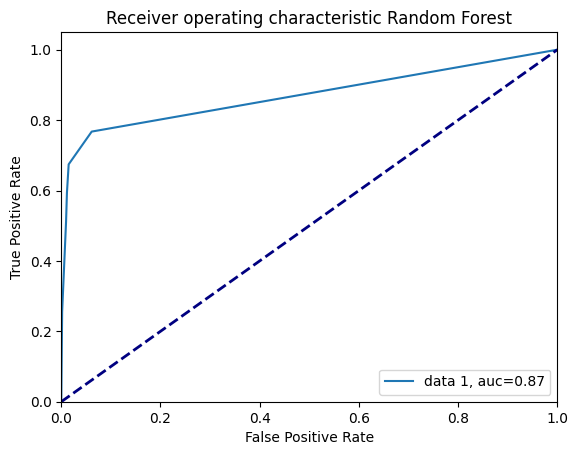

In [128]:
plot_roc_curve(pipe_knn,X_test_feature_set, y_test, "Random Forest")

##Model Build with Cross Validation

In [ ]:
"""
We will be tuning three models
KNN
Logistic Regression
Random Forest
"""

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import BaseCrossValidator
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV      # For optimization

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import classification_report
from sklearn import metrics

from dataclasses import dataclass

In [19]:
feature_set_consider = ['DateMappingMatch',
 'DescriptionMatch',
 'DifferentPredictedDate_Category',
 'ShortNameMatch_Category',
 'PredictedNameMatch',
 'TimeMappingMatch_Category']

In [20]:
# Seeking from Analysis Based on analyzing Random Forest and Logistic Regression Model
final_feature_set = ['DateMappingMatch', 'DescriptionMatch',
       'DifferentPredictedDate_Category_1', 'TimeMappingMatch_Category_1',
       'PredictedNameMatch', 'ShortNameMatch_Category_1',
       'DifferentPredictedDate_Category_TimeMappingMatch_Category',
       'DateMappingMatch_DifferentPredictedDate_Category']

In [21]:
class CustomMatchCrossValidator(BaseCrossValidator):
    def __init__(self, n_splits=3):
        self.n_splits = n_splits
        self.kf = KFold(n_splits=n_splits)

    def split(self, X, y, groups=None):
      receipt_id_series = X["receipt_id"]
      unique_receipt_id = X["receipt_id"].unique()
      num_ids = len(unique_receipt_id)
      receipt_id_indices = np.arange(num_ids)
      for i, (train_index, test_index) in enumerate(self.kf.split(unique_receipt_id)):
        test_receipt_id = unique_receipt_id[test_index]
        test_mask = receipt_id_series.isin(test_receipt_id)
        train_mask = ~test_mask
        yield np.where(train_mask)[0], np.where(test_mask)[0]

    def get_n_splits(self, X, y, groups=None):
        return self.n_splits

In [25]:
cust_tide_data = pd.get_dummies(tide_receipt_df[feature_set_consider],drop_first=True)
cust_tide_data.loc[:, "receipt_id"] = tide_receipt_df.loc[:, "receipt_id"]
cust_tide_data.loc[:, "match"] = tide_receipt_df.loc[:, "match"]

In [26]:
cust_tide_data["DateMappingMatch_DifferentPredictedDate_Category"] = cust_tide_data["DateMappingMatch"] * cust_tide_data["DifferentPredictedDate_Category_1"]
cust_tide_data["DifferentPredictedDate_Category_TimeMappingMatch_Category"] = cust_tide_data["DifferentPredictedDate_Category_1"] * cust_tide_data["TimeMappingMatch_Category_1"]
cust_tide_data["DifferentPredictedDate_Category_ShortNameMatch_Category"] = cust_tide_data["DifferentPredictedDate_Category_1"] * cust_tide_data["ShortNameMatch_Category_1"]

In [27]:
knn_parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
 Normalizer(), MaxAbsScaler()],
 'selector__threshold': [0, 0.001, 0.01],
 'classifier__n_neighbors': [1, 3, 5],
 'classifier__p': [1, 2]
}

logreg_parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
 Normalizer(), MaxAbsScaler()],
 'selector__threshold': [0, 0.001, 0.01],
 'classifier__C': [0.1, 1, 10],
 'classifier__penalty': [None,"l2"]
}

rf_parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
 Normalizer(), MaxAbsScaler()],
 'selector__threshold': [0, 0.001, 0.01],
 'classifier__n_estimators':[100, 200, 500],
 'classifier__max_depth': [5, 6, 7],
}

pipe_knn = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

pipe_logreg = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', LogisticRegression(random_state=2023))
])

pipe_rf = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', RandomForestClassifier())
])


In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
@dataclass
class ModelPerformance:
  training_score: np.float64
  test_score: np.float64
  auc_score: np.float64
  best_estimator: Pipeline
  cross_valid_details: pd.DataFrame


In [ ]:
ckf = CustomMatchCrossValidator(n_splits=10)

knn_model_metric = {}
logreg_model_metric = {}
rf_model_metric = {}


for train_index, test_index in ckf.split(cust_tide_data, None):

    tX_train, tX_test, ty_train, ty_test = (cust_tide_data.iloc[train_index],
                                        cust_tide_data.iloc[test_index],
                                        cust_tide_data.iloc[train_index]["match"],
                                        cust_tide_data.iloc[test_index]["match"])

    for i, feature_size in enumerate([4, 5, 6]):

        print(f"feature size used {feature_size}")

        tX_train_m = tX_train[final_feature_set[:feature_size]]
        tX_test_m = tX_test[final_feature_set[:feature_size]]

        print(f"X_train {tX_train_m.shape} X_test {tX_test_m.shape}. y_train{ty_train.shape} y_test{ty_test.shape}")

        print("Running for KNN")
        grid_knn = GridSearchCV(pipe_knn, knn_parameters, cv=7, scoring='roc_auc').fit(tX_train_m, ty_train)

        #print('KNN Training set score: ' + str(grid_knn.best_estimator_.score(tX_train, ty_train)))
        print('KNN Test set score: ' + str(grid_knn.best_estimator_.score(tX_test_m, ty_test)))

        m_knn = ModelPerformance(grid_knn.best_estimator_.score(tX_train_m, ty_train),
                         grid_knn.best_estimator_.score(tX_test_m, ty_test),
                         auc_metric(grid_knn, tX_test_m, ty_test),
                         grid_knn.best_estimator_,
                         pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns'))

        knn_model_metric.setdefault(i, [])
        knn_model_metric[i].append(m_knn)

        print("Running for Logistic Regression")
        grid_logreg = GridSearchCV(pipe_logreg, logreg_parameters, cv=7, scoring='roc_auc').fit(tX_train_m, ty_train)

        #print('LogReg Training set score: ' + str(grid_logreg.best_estimator_.score(tX_train, ty_train)))
        print('LogReg Test set score: ' + str(grid_logreg.best_estimator_.score(tX_test_m, ty_test)))

        m_logreg = ModelPerformance(grid_logreg.best_estimator_.score(tX_train_m, ty_train),
                         grid_logreg.best_estimator_.score(tX_test_m, ty_test),
                         auc_metric(grid_logreg, tX_test_m, ty_test),
                         grid_logreg.best_estimator_,
                         pd.DataFrame.from_dict(grid_logreg.cv_results_, orient='columns'))

        logreg_model_metric.setdefault(i, [])
        logreg_model_metric[i].append(m_logreg)

        print("Running for Random Forest")
        grid_rf = GridSearchCV(pipe_rf, rf_parameters, cv=7, scoring='roc_auc').fit(tX_train_m, ty_train)

        #print('RF Training set score: ' + str(grid_rf.best_estimator_.score(tX_train, ty_train)))
        print('RF Test set score: ' + str(grid_rf.best_estimator_.score(tX_test_m, ty_test)))

        m_rf = ModelPerformance(grid_rf.best_estimator_.score(tX_train_m, ty_train),
                         grid_rf.best_estimator_.score(tX_test_m, ty_test),
                         auc_metric(grid_rf, tX_test_m, ty_test),
                         grid_rf.best_estimator_,
                         pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns'))

        rf_model_metric.setdefault(i, [])
        rf_model_metric[i].append(m_rf)

        print("-"*65)




In [33]:
[m.auc_score for m in logreg_model_metric[0]]

[0.9240659280981862, 0.9545965487908616, 0.9597244657537065]

In [34]:
[m.auc_score for m in knn_model_metric[0]]

[0.9323612468773759, 0.9549712399238466, 0.958762462317245]

In [35]:
[m.auc_score for m in rf_model_metric[0]]

[0.9185447666630462, 0.9547281970267751, 0.9611546098998899]

####Analyzing Results

In [37]:
model_auc_perf_4 = pd.DataFrame(data = {"knn": [m.auc_score for m in knn_model_metric[0]],
                                          "logreg": [m.auc_score for m in logreg_model_metric[0]],
                                          "rf": [m.auc_score for m in rf_model_metric[0]]
                                          })

model_auc_perf_5 = pd.DataFrame(data = {"knn": [m.auc_score for m in knn_model_metric[1]],
                                          "logreg": [m.auc_score for m in logreg_model_metric[1]],
                                          "rf": [m.auc_score for m in rf_model_metric[1]]
                                          })

model_auc_perf_6 = pd.DataFrame(data = {"knn": [m.auc_score for m in knn_model_metric[2]],
                                          "logreg": [m.auc_score for m in logreg_model_metric[2]],
                                          "rf": [m.auc_score for m in rf_model_metric[2]]
                                          })

Text(0.5, 0, 'Cross Validation Instances')

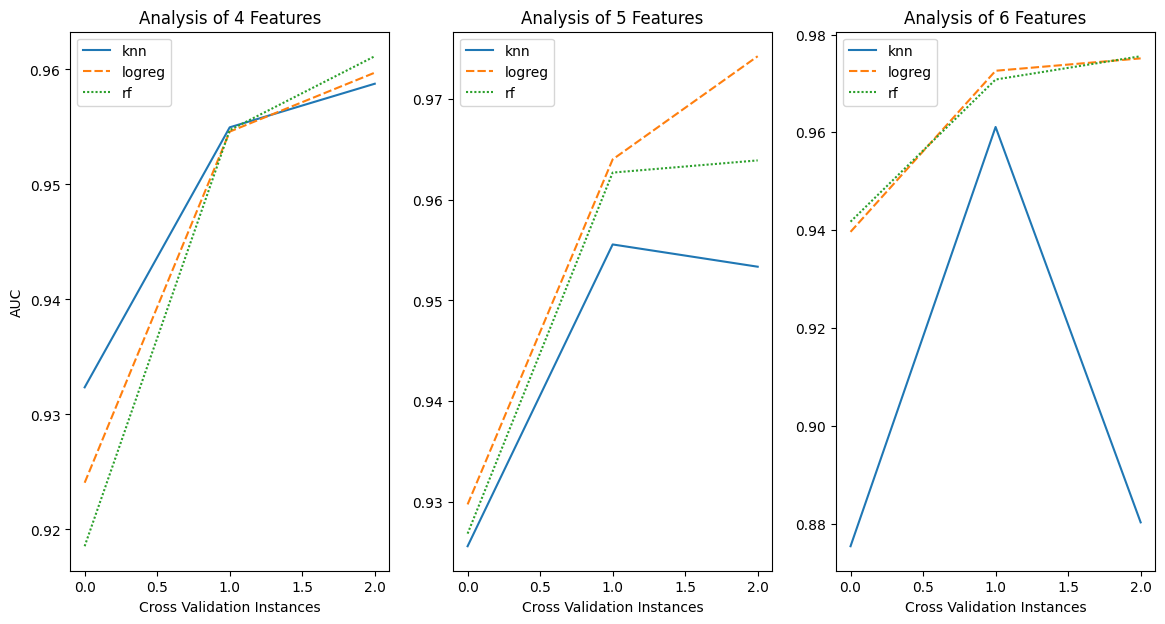

In [51]:
fig, axs = plt.subplots(ncols = 3, figsize=(14,7))
sns.lineplot(data=model_auc_perf_4, ax= axs[0])
axs[0].set_title("Analysis of 4 Features")
axs[0].set_xlabel('Cross Validation Instances')
axs[0].set_ylabel("AUC")

sns.lineplot(data=model_auc_perf_5, ax= axs[1])
axs[1].set_title("Analysis of 5 Features")
axs[1].set_xlabel('Cross Validation Instances')

sns.lineplot(data=model_auc_perf_6, ax= axs[2])
axs[2].set_title("Analysis of 6 Features")
axs[2].set_xlabel('Cross Validation Instances')

In [50]:
model_test_score_perf_4 = pd.DataFrame(data = {"knn": [m.test_score for m in knn_model_metric[0]],
                                          "logreg": [m.test_score for m in logreg_model_metric[0]],
                                          "rf": [m.test_score for m in rf_model_metric[0]]
                                          })

model_test_score_perf_5 = pd.DataFrame(data = {"knn": [m.test_score for m in knn_model_metric[1]],
                                          "logreg": [m.test_score for m in logreg_model_metric[1]],
                                          "rf": [m.test_score for m in rf_model_metric[1]]
                                          })

model_test_score_perf_6 = pd.DataFrame(data = {"knn": [m.test_score for m in knn_model_metric[2]],
                                          "logreg": [m.test_score for m in logreg_model_metric[2]],
                                          "rf": [m.test_score for m in rf_model_metric[2]]
                                          })

Text(0.5, 0, 'Cross Validation Instances')

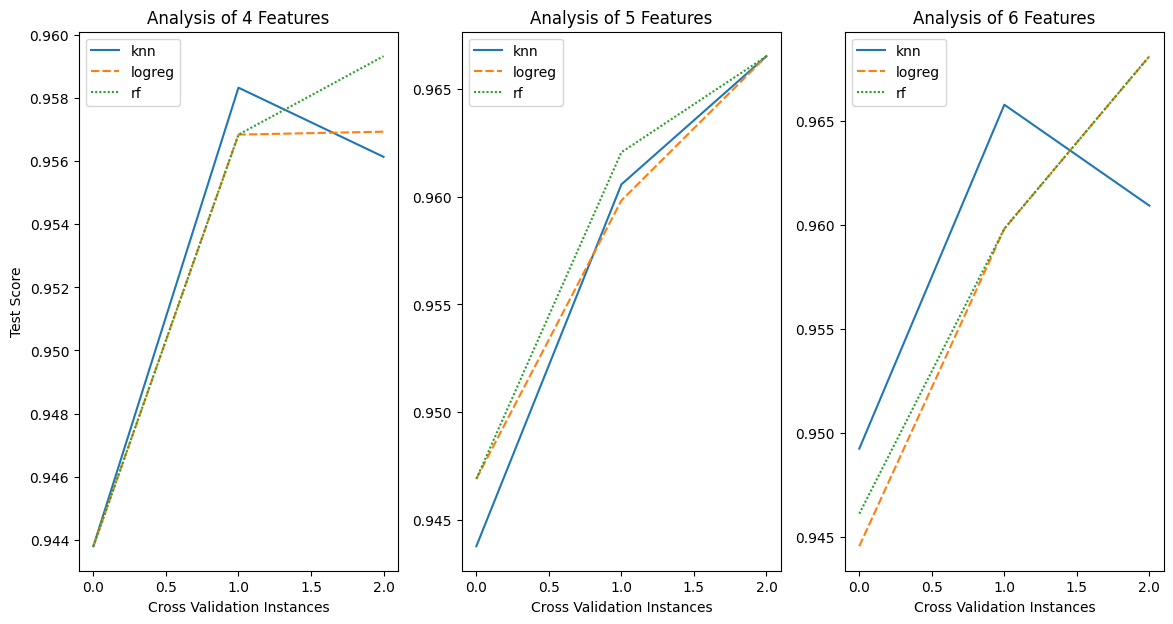

In [53]:
fig, axs = plt.subplots(ncols = 3, figsize=(14,7))
sns.lineplot(data=model_test_score_perf_4, ax= axs[0])
axs[0].set_title("Analysis of 4 Features")
axs[0].set_xlabel('Cross Validation Instances')
axs[0].set_ylabel("Test Score")

sns.lineplot(data=model_test_score_perf_5, ax= axs[1])
axs[1].set_title("Analysis of 5 Features")
axs[1].set_xlabel('Cross Validation Instances')

sns.lineplot(data=model_test_score_perf_6, ax= axs[2])
axs[2].set_title("Analysis of 6 Features")
axs[2].set_xlabel('Cross Validation Instances')

In [48]:
knn_feature_perf = pd.DataFrame(data = {"Num_Features_4": [m.auc_score for m in knn_model_metric[0]],
                                          "Num_Features_5": [m.auc_score for m in knn_model_metric[1]],
                                          "Num_Features_6": [m.auc_score for m in knn_model_metric[2]]
                                          })

log_reg_feature_perf = pd.DataFrame(data = {"Num_Features_4": [m.auc_score for m in logreg_model_metric[0]],
                                          "Num_Features_5": [m.auc_score for m in logreg_model_metric[1]],
                                          "Num_Features_6": [m.auc_score for m in logreg_model_metric[2]]
                                          })
rf_feature_perf = pd.DataFrame(data = {"Num_Features_4": [m.auc_score for m in rf_model_metric[0]],
                                          "Num_Features_5": [m.auc_score for m in rf_model_metric[1]],
                                          "Num_Features_6": [m.auc_score for m in rf_model_metric[2]]
                                          })

Text(0.5, 0, 'Cross Validation Instances')

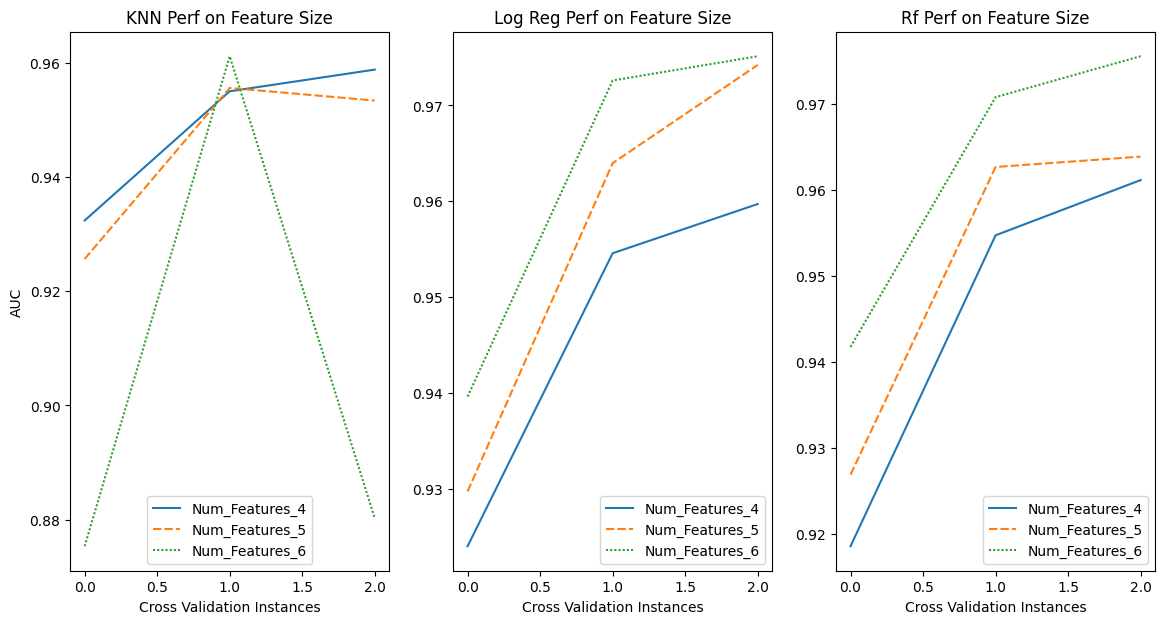

In [49]:
fig, axs = plt.subplots(ncols = 3, figsize=(14,7))
sns.lineplot(data=knn_feature_perf, ax=axs[0])
axs[0].set_title("KNN Perf on Feature Size")
axs[0].set_xlabel('Cross Validation Instances')
axs[0].set_ylabel("AUC")

sns.lineplot(data=log_reg_feature_perf, ax=axs[1])
axs[1].set_title("Log Reg Perf on Feature Size")
axs[1].set_xlabel('Cross Validation Instances')

sns.lineplot(data=rf_feature_perf, ax=axs[2])
axs[2].set_title("Rf Perf on Feature Size")
axs[2].set_xlabel('Cross Validation Instances')

##Final Model

In [ ]:
"""
# We chose Logisitic Regression Model, there was no significant difference in performance
# Additionally, Logisitic Regression is a simple model, fast to train and deploy

# For Feature selection we had choice to select top 4, 5 or 6 features, however adding more features marginally
# improved the model performance (AUC) so we choose a simple model of using only 4 features.
"""

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
from sklearn import metrics
import joblib

# Library
def match_func(x):
  if x["matched_transaction_id"] == x["feature_transaction_id"]:
    return "Yes"
  else:
    return "No"

def convert_to_category(s):
  return s.astype(int).astype('category')

# Load Data
user_receipt_data = pd.read_csv("/content/data_interview_test.csv", sep=":")

# Pick Top Performing Predictors
pfinal_feature_set = ['DateMappingMatch', 'DescriptionMatch','DifferentPredictedDate_Category', 'TimeMappingMatch_Category']

if ("matched_transaction_id" in user_receipt_data.columns) and ("feature_transaction_id" in user_receipt_data.columns) and \
("DateMappingMatch" in user_receipt_data.columns) and ("DescriptionMatch" in user_receipt_data.columns) and \
("DifferentPredictedDate" in user_receipt_data.columns) and ("TimeMappingMatch" in user_receipt_data.columns):

  print("Convert Variable to Category...")
  user_receipt_data["DifferentPredictedDate_Category"] = convert_to_category(user_receipt_data["DifferentPredictedDate"])
  user_receipt_data["TimeMappingMatch_Category"] = convert_to_category(user_receipt_data["TimeMappingMatch"])

  user_receipt_data["match"] = user_receipt_data[["matched_transaction_id", "feature_transaction_id"]].apply(match_func, axis = 1)

  print("Create Dummy Variables...")
  en_user_receipt_data = pd.get_dummies(user_receipt_data[pfinal_feature_set], drop_first=True)
  en_user_receipt_data.loc[:, "match"] = user_receipt_data.loc[:, "match"]

  X_user_data = en_user_receipt_data.drop(columns= "match")
  y_user_data = en_user_receipt_data["match"]

  logreg_parameters = {'scaler': [StandardScaler()],
  'selector__threshold': [0, 0.01, 0.001],
  'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # Lets try bigger combination
  'classifier__penalty': [None,"l2"]
  }

  pipe_logreg = Pipeline([
  ('scaler', StandardScaler()),
  ('selector', VarianceThreshold()),
  ('classifier', LogisticRegression(random_state=2023))
  ])

  print("Perform Grid Search...")
  grid = GridSearchCV(pipe_logreg, logreg_parameters, cv=10).fit(X_user_data, y_user_data)

  best_params_ = grid.best_params_
  best_classifer_ = grid.best_estimator_
  print(f"Best Classifier {best_classifer_}")

  print("Fit the Best Model...")
  best_classifer_.fit(X_user_data, y_user_data)

  print("Save the Best Model...")
  joblib.dump(best_classifer_, '/content/transaction_matching_model.pkl')

else:
  print("Error missing required columns from the data")

Convert Variable to Category...
Create Dummy Variables...
Perform Grid Search...
Best Classifier Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier', LogisticRegression(C=1, random_state=2023))])
Fit the Best Model...
Save the Best Model...


##Model Use

In [133]:
import pandas as pd
import joblib
class FeatureSelection:
  final_feature_set = ['DateMappingMatch',
                       'DescriptionMatch',
                       'DifferentPredictedDate_Category',
                       'TimeMappingMatch_Category']

  def __call__(self, data):
    try:
      self.data = data
      self.data["DifferentPredictedDate_Category"] = convert_to_category(self.data["DifferentPredictedDate"])
      self.data["TimeMappingMatch_Category"] = convert_to_category(self.data["TimeMappingMatch"])
      self.en_data = pd.get_dummies(self.data[final_feature_set],drop_first=True)

      if "TimeMappingMatch_Category_1" not in self.en_data.columns:
        self.en_data["TimeMappingMatch_Category_1"] = 0

      if "DifferentPredictedDate_Category" not in self.en_data.columns:
        self.en_data["DifferentPredictedDate_Category_1"] = 0

      return self.en_data
    except Exception as e:
      print("The error is: ",e)
      return None

class UserTransactionPredictor:

  def __init__(self, user_data):
    self.user_data = user_data
    fc = FeatureSelection()
    self.en_user_data = fc(self.user_data)
    self.model = joblib.load('/content/transaction_matching_model.pkl')

  def predict(self):
    if self.en_user_data is None:
      return None
    id_matching_probability = self.model.predict_proba(self.en_user_data)[::,1]
    self.user_data.loc[:, "matching_probability"] = id_matching_probability
    return self.user_data.sort_values("matching_probability", ascending = False)

In [123]:
user_test_reg_id = user_receipt_data[user_receipt_data.receipt_id == "10,176"]

In [124]:
pred_handle = UserTransactionPredictor(user_test_reg_id)

In [125]:
pred_handle.predict()

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,DifferentPredictedDate_Category,TimeMappingMatch_Category,match,matching_probability
1952,"10,176",10000,"10,606","10,606",0.95,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1,Yes,0.961370
1951,"10,176",10000,"10,606","10,605",0.95,0.0,0.4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,No,0.705346
1946,"10,176",10000,"10,606","10,596",0.00,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,No,0.000822
1947,"10,176",10000,"10,606","10,597",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,No,0.000822
1948,"10,176",10000,"10,606","10,598",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,No,0.000822
1949,"10,176",10000,"10,606","10,599",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,No,0.000822
1950,"10,176",10000,"10,606","10,600",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,No,0.000822


In [130]:
user_test_reg_id = user_receipt_data[user_receipt_data.receipt_id == "20,167"]

In [131]:
pred_handle = UserTransactionPredictor(user_test_reg_id)

In [132]:
pred_handle.predict()

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,DifferentPredictedDate_Category,TimeMappingMatch_Category,match,matching_probability
4126,"20,167",20000,"20,290","20,290",0.95,0.0,0.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,Yes,0.941396
4127,"20,167",20000,"20,290","20,291",0.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,No,0.262933
4123,"20,167",20000,"20,290","20,287",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,No,0.000822
4124,"20,167",20000,"20,290","20,288",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,No,0.000822
4125,"20,167",20000,"20,290","20,289",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,No,0.000822
